# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error


# Importing Dataset

In [2]:
df1 =  pd.read_csv("car_data.csv")
# importing the dataset to our jupyter notebook

In [3]:
df1
# the original dataset

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df1.shape
# gives us the rows and columns of the dataset

(301, 9)

In [6]:
df1.columns
# gives out the various columns present in the dataset

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

# Data Cleaning

In [7]:
df1.info()
# knowing the information about the columns of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df1.describe()
#eturns description of the data in the DataFrame

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df1.describe(include='object')
# returns the description about the non numerical values

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [10]:
df1

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
df1['Fuel_Type'] =  df1['Fuel_Type'].replace('Petrol' , 0 )
df1['Fuel_Type'] =  df1['Fuel_Type'].replace('Diesel' , 1 )
df1['Fuel_Type'] =  df1['Fuel_Type'].replace('CNG' , 2 )
#replacing gas by 1 and diesel by 0

In [12]:
df1['Transmission'] =  df1['Transmission'].replace('Manual' , 0 )
df1['Transmission'] =  df1['Transmission'].replace('Automatic' , 1 )

In [13]:
df1['Selling_type'] =  df1['Selling_type'].replace('Dealer' , 0 )
df1['Selling_type'] =  df1['Selling_type'].replace('Individual' , 1 )

In [14]:
df1['Fuel_Type'] = df1['Fuel_Type'].astype(int)
# converting the column "fueltype" from string to integer

In [15]:
df1['Transmission'] = df1['Transmission'].astype(int)

In [16]:
df1['Selling_type'] = df1['Selling_type'].astype(int)

In [17]:
df1.isnull().sum()
# checking out the sum of the null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [18]:
df1.duplicated().sum()
#checking the sum of duplicated values in the dataset

2

In [19]:
df1['Fuel_Type'].value_counts()


0    239
1     60
2      2
Name: Fuel_Type, dtype: int64

In [20]:
df1['Transmission'].value_counts()

0    261
1     40
Name: Transmission, dtype: int64

In [21]:
df1['Selling_type'].value_counts()

0    195
1    106
Name: Selling_type, dtype: int64

In [22]:
df_null = df1.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Driven_kms       0.0
dtype: float64

In [23]:
cat_col = df1.select_dtypes(include=['object']).columns
num_col = df1.select_dtypes(exclude=['object']).columns
df1[cat_col]=df1[cat_col].astype(str)
df_cat = df1[cat_col]
df_num = df1[num_col] 

# Outliers Detection and Removal

IndexError: index 2 is out of bounds for axis 0 with size 2

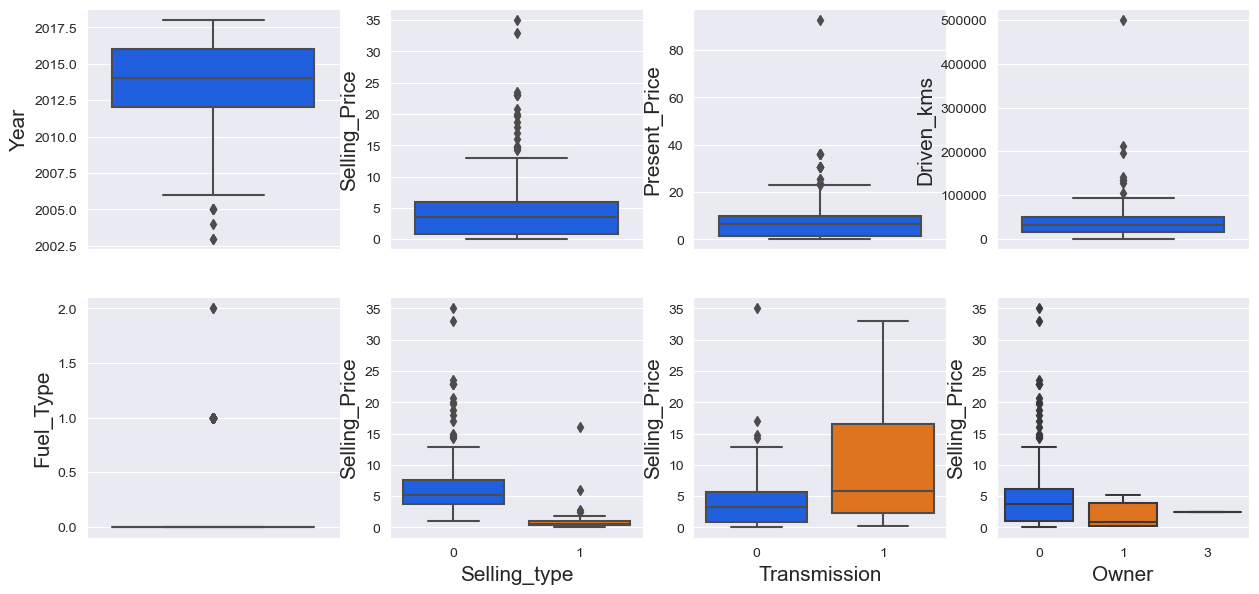

In [24]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df1.select_dtypes(exclude='object').columns.values, 
                              df1.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<5:
        sns.boxplot(data=df1, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df1, x=col, y='Selling_Price', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()    
plt.show()

<AxesSubplot:xlabel='Selling_Price'>

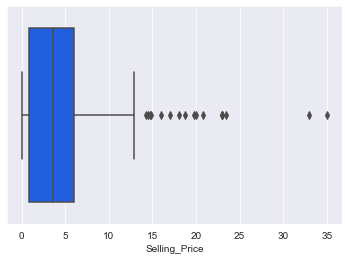

In [25]:
sns.boxplot(data=df1,x='Selling_Price')

In [26]:
percent25 = np.percentile(df1['Selling_Price'] , 25)
print(percent25)

percent50 = np.percentile(df1['Selling_Price'] , 50)
print(percent50)

percent75 = np.percentile(df1['Selling_Price'] , 50)
print(percent75)

0.9
3.6
3.6


In [27]:
iqr = percent75 - percent25
iqr

2.7

In [28]:
upper_limit = percent75 - (1.5*iqr)
lower_limit = percent25 - (1.5*iqr)

In [29]:
print(upper_limit)  #6534.5
print(lower_limit)  #4027.5

-0.4500000000000006
-3.150000000000001


In [30]:
df_upperoutliers = df1[df1['Selling_Price'] > upper_limit]
df_upperoutliers

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [31]:
df_upperoutliers.shape

(301, 9)

In [32]:
df_loweroutliers = df1[df1['Selling_Price'] < lower_limit]
df_loweroutliers

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner


In [33]:
df_loweroutliers.shape

(0, 9)

In [34]:
#the outliers were deducted

# Data Visualization

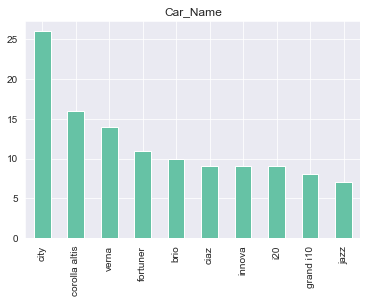

In [35]:
ax=df1['Car_Name'].value_counts().head(10).plot(kind='bar',colormap = 'Set2')
ax.title.set_text('Car_Name')


##from the above bar graph toyota has the highest sales

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='Selling_Price', ylabel='Count'>

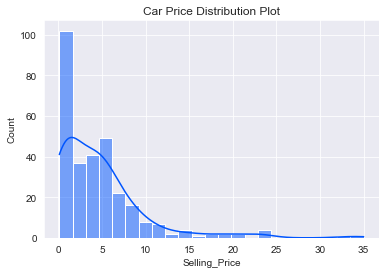

In [36]:
plt.title('Car Price Distribution Plot')
sns.histplot(df1["Selling_Price"], kde=True)

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='Present_Price', ylabel='Count'>

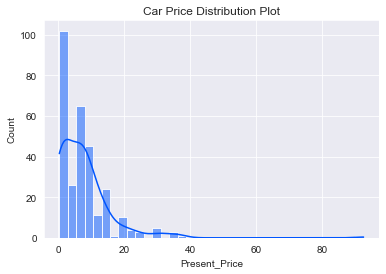

In [37]:
plt.title('Car Price Distribution Plot')
sns.histplot(df1["Present_Price"], kde=True)

<AxesSubplot:xlabel='Driven_kms', ylabel='Density'>

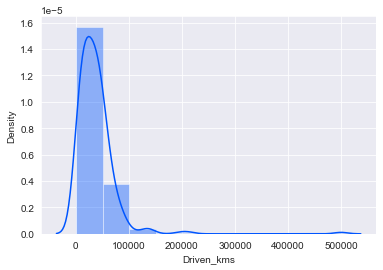

In [38]:
sns.distplot(df1.Driven_kms, bins = 10)

##clearly the normal distribution of the prices are right skewed

NameError: name 'df' is not defined

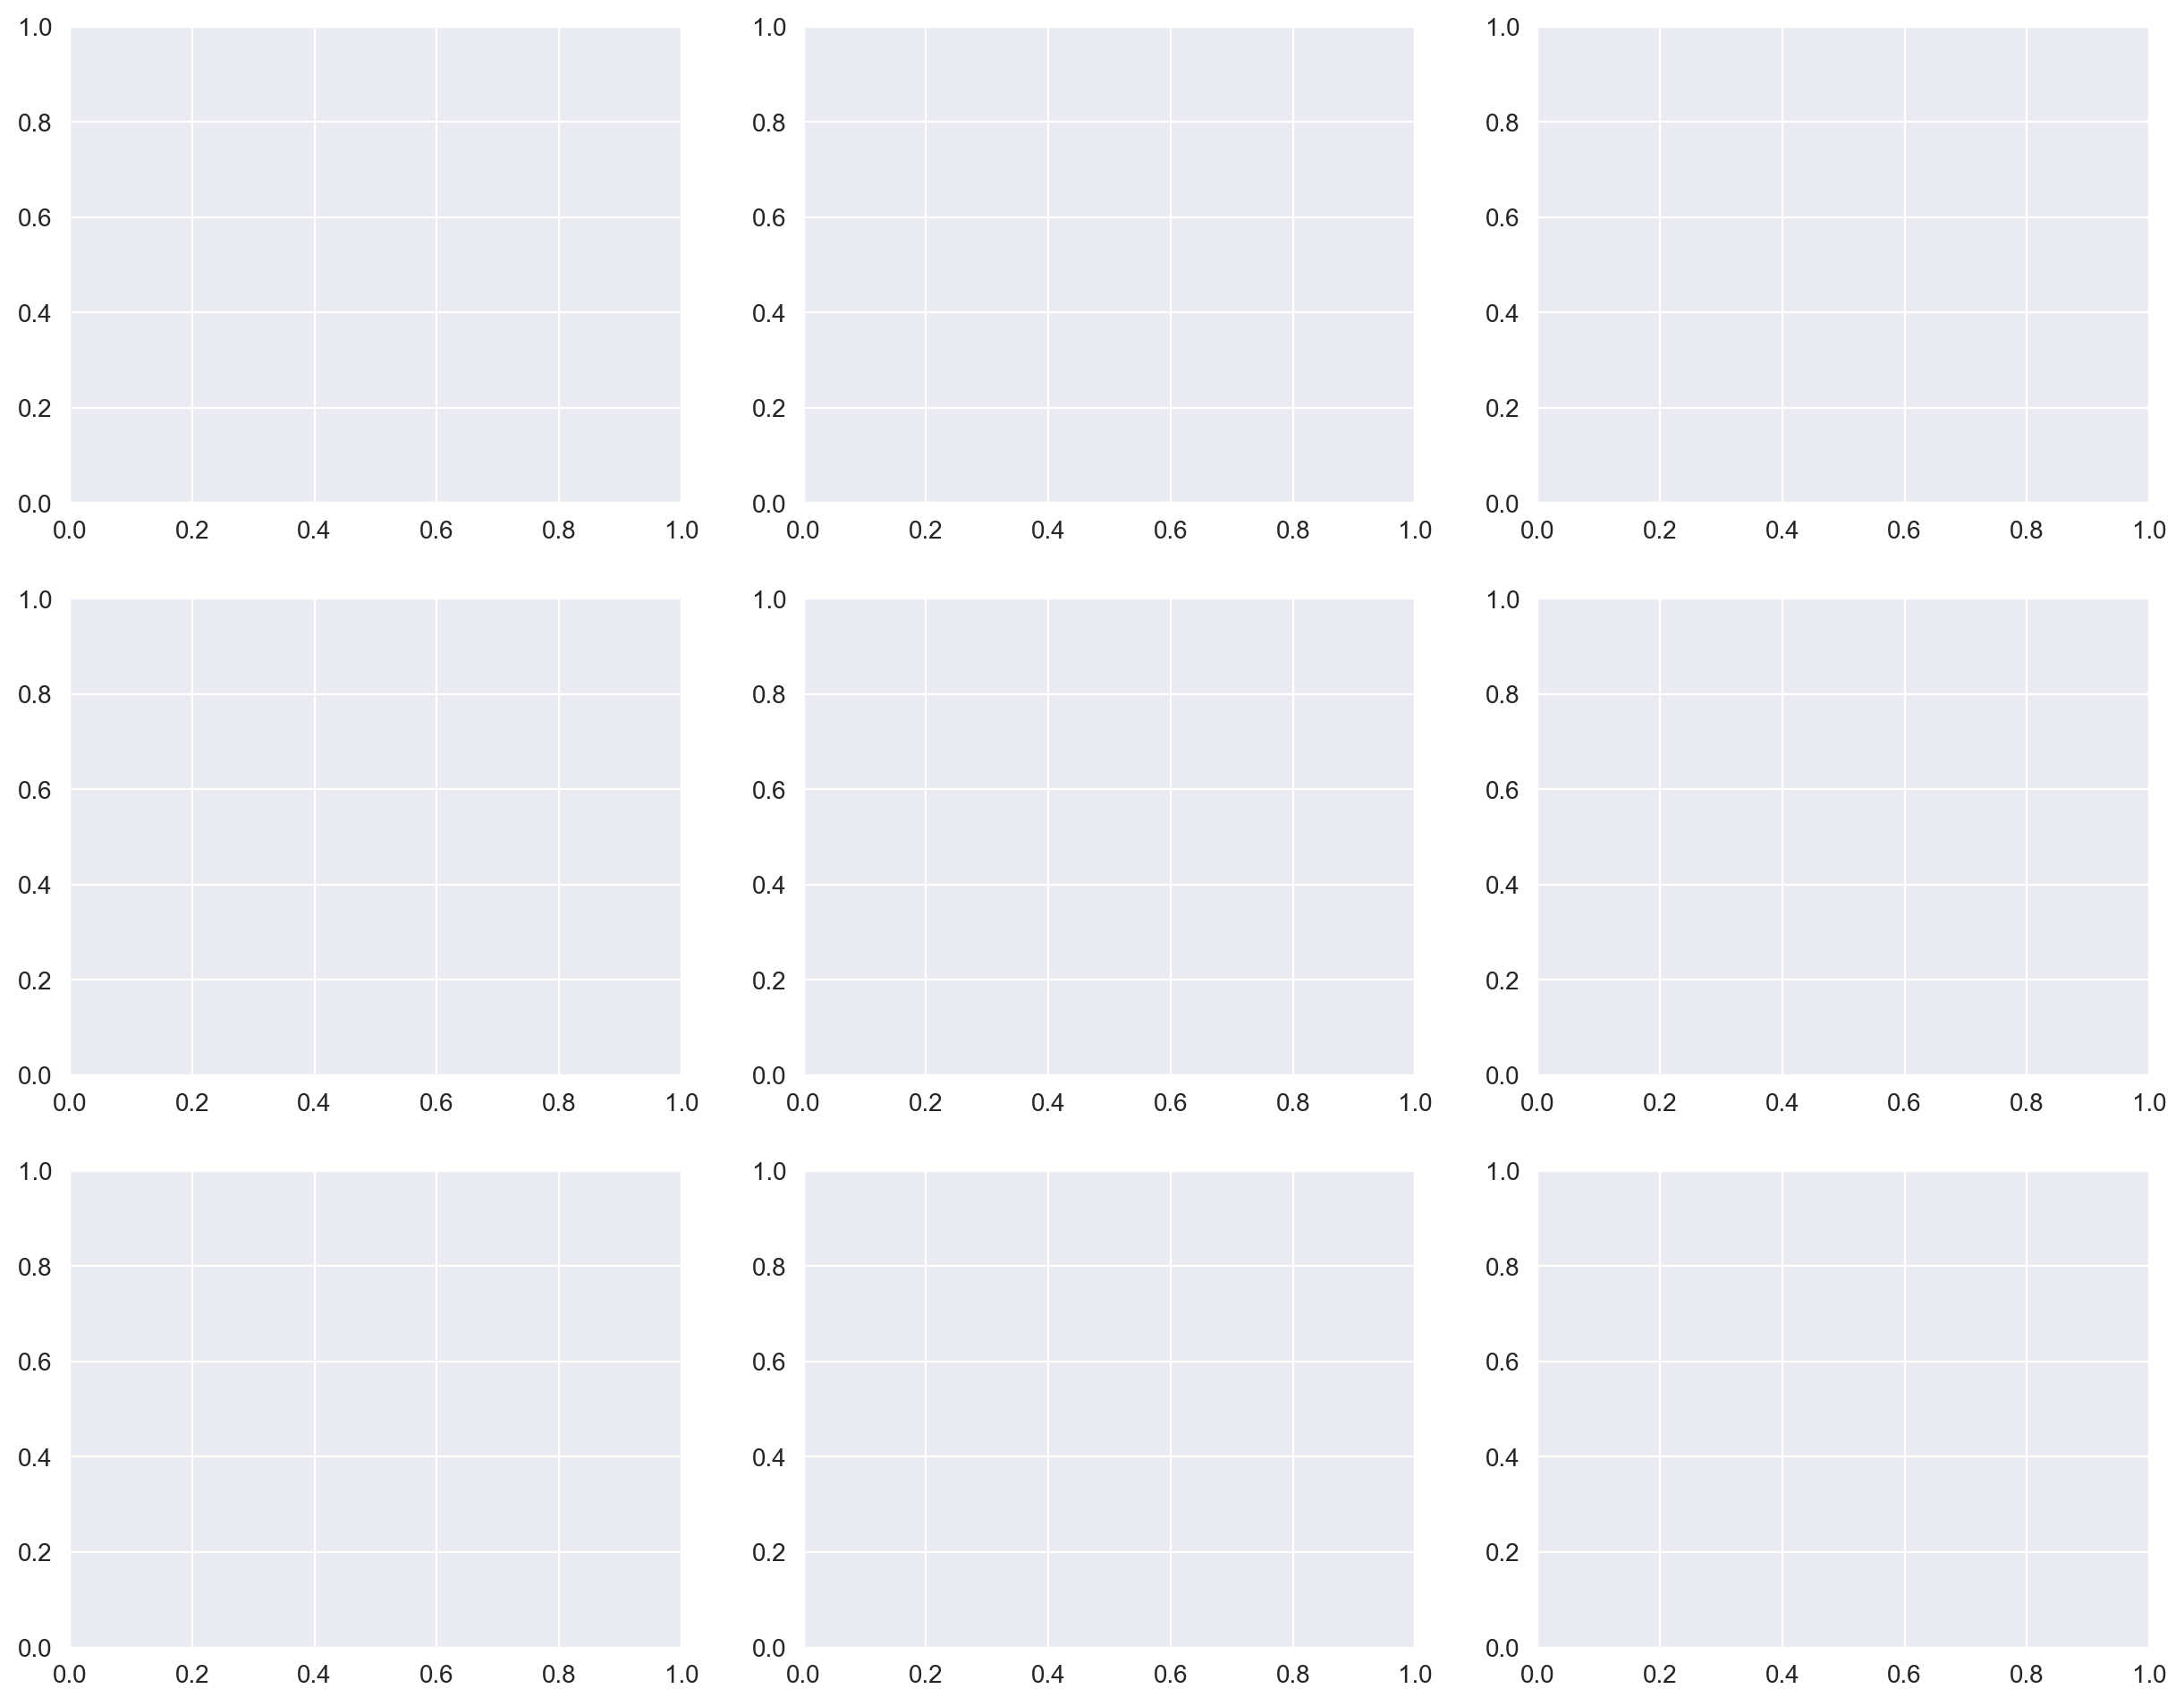

In [39]:
#sns.pairplot(data=df,kind='scatter')
target = 'Selling_Price'
features = df1.columns.drop(target)
colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=df1, x=features[i], y=target, ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
color_palette = "Set1"
sns.pairplot(df1, hue="Fuel_Type", palette=color_palette)
plt.show() 

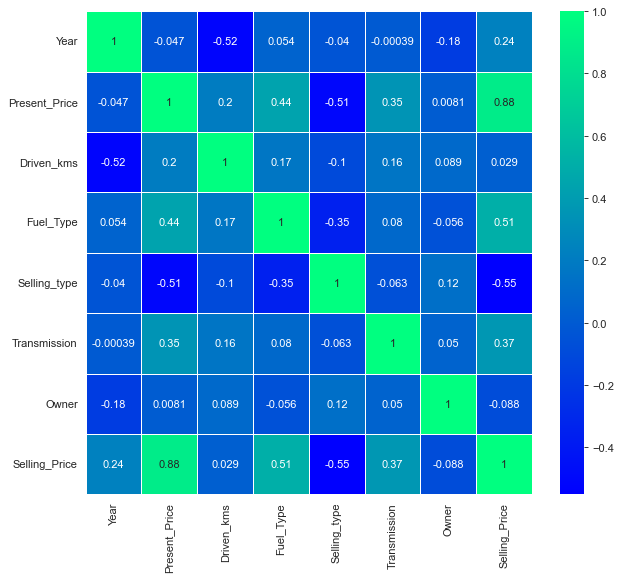

In [57]:
target = 'Selling_Price'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([df1.drop(target,axis=1), df1[target]],axis=1).corr(), annot=True, cmap="winter", linewidth = 0.5)
plt.show()

<AxesSubplot:xlabel='Selling_Price', ylabel='Driven_kms'>

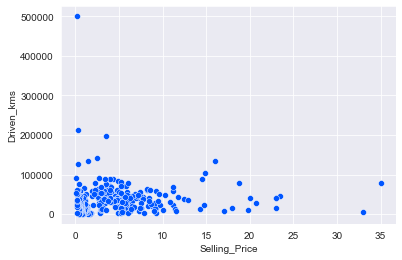

In [41]:
sns.scatterplot(x='Selling_Price',y='Driven_kms',data=df1)

##clearly we can see a spike when price is increased the horsepower is also increased

<AxesSubplot:xlabel='Present_Price', ylabel='Driven_kms'>

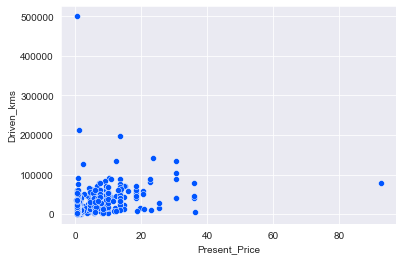

In [42]:
sns.scatterplot(x='Present_Price',y='Driven_kms',data=df1)

<AxesSubplot:xlabel='Selling_Price', ylabel='Fuel_Type'>

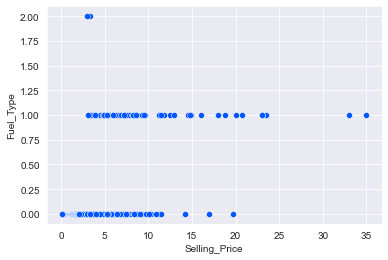

In [43]:
sns.scatterplot(x='Selling_Price',y='Fuel_Type',data=df1)

we can clearly see that there is no such relation between the price of the car and the peak repm of the vehicle
 

# Improvising ML Algorithms

In [44]:
# Select relevant features and target variable
selected_features = ['Car_Name', 'Driven_kms', 'Fuel_Type']
target = 'Selling_Price'


In [45]:
X = df1[selected_features]
y = df1[target]

In [46]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

In [47]:
# Step 3: Data Splitting
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
#  Model Selection and Training
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Model Evaluation
# Predict car prices on the test set
y_pred = model.predict(X_test)


In [50]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [51]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 74471812235863.39
Mean Absolute Error: 1484504.6460718676
R-squared: -3232903083932.772
